In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [ ]:
train_neg = [tweet[:-1] for tweet in open('./train_neg.txt').readlines()]
train_pos = [tweet[:-1] for tweet in open('./train_pos.txt').readlines()]
test_data = [tweet[:-1] for tweet in open('./test_data.txt').readlines()]

# import vocab_cut
vocab = [word[:-1] for word in open('./vocab_cut.txt').readlines()]

In [ ]:
X, y = np.array(train_neg + train_pos), np.array([0 for i in range(len(train_neg))]+[1 for i in range(len(train_pos))])

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(X)

In [ ]:
#print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
test_X = tokenizer.texts_to_sequences(test_data)
#print("Sequences")
#X_seqs[:10]

In [ ]:
idx2words = tokenizer.index_word

#print("Word Mappings\n")
#for i in range(1,10):
    #print("Index: ",i, "---->",idx2words[i])

In [ ]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 103130


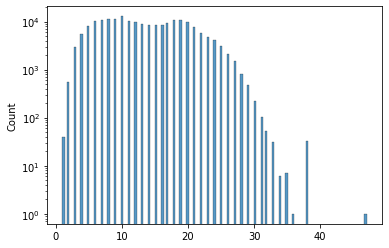

In [ ]:
lens = [len(seq) for seq in X_seqs]
sns.histplot(x=lens)
plt.yscale('log')
plt.show()


In [ ]:
from keras_preprocessing.sequence import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)
test_X_pd = pad_sequences(test_X, truncating="pre", padding="pre", maxlen=max_len)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.15, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (170000, 40)
Training y Dim  (170000,)
Test X Dim  (30000, 40)
Test y Dim  (30000,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=40

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 40, 40)            4125240   
                                                                 
 lstm_38 (LSTM)              (None, 40, 80)            38720     
                                                                 
 dropout_38 (Dropout)        (None, 40, 80)            0         
                                                                 
 lstm_39 (LSTM)              (None, 40)                19360     
                                                                 
 dropout_39 (Dropout)        (None, 40)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 82        
                                                                 
Total params: 4,183,402
Trainable params: 4,183,402
N

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)


model.compile(loss = 'binary_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
#batch_size=128
batch_size = 128
epochs = 20

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_cat), callbacks=[early_stop])


Epoch 1/20
1329/1329 [==============================] - 20s 13ms/step - loss: 0.4398 - accuracy: 0.7879 - val_loss: 0.3874 - val_accuracy: 0.8185
Epoch 2/20
1329/1329 [==============================] - 16s 12ms/step - loss: 0.3350 - accuracy: 0.8499 - val_loss: 0.3857 - val_accuracy: 0.8225
Epoch 3/20
1329/1329 [==============================] - 16s 12ms/step - loss: 0.2756 - accuracy: 0.8807 - val_loss: 0.4176 - val_accuracy: 0.8203
Epoch 3: early stopping


In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

235/235 [==============================] - 1s 5ms/step - loss: 0.4176 - accuracy: 0.8203


[0.41758209466934204, 0.8203333616256714]

In [ ]:
pred = model.predict(test_X_pd)

313/313 [==============================] - 1s 4ms/step


In [ ]:
pred_list = [-1 if pred[i,0]>pred[i,1] else 1 for i in range(10000)]

In [ ]:
df = pd.DataFrame.from_dict({'Id' : range(1, 10001), 'Prediction': pred_list})
df.to_csv('submission1.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


predictions = model.predict(X_test)
#print(classification_report(y_test, predictions))

1875/1875 [==============================] - 7s 3ms/step


ValueError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=128


model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 40, 128)           13200768  
                                                                 
 bidirectional_6 (Bidirectio  (None, 40, 160)          133760    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 40, 160)          154240    
 nal)                                                            
                                                                 
 global_max_pooling1d_3 (Glo  (None, 160)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_30 (Dropout)        (None, 160)               0         
                                                     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'binary_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=64
epochs = 15

model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, 
          shuffle=True,validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/15
2657/2657 [==============================] - 62s 21ms/step - loss: 0.4165 - accuracy: 0.5006 - val_loss: 0.3647 - val_accuracy: 0.4967
Epoch 2/15
2657/2657 [==============================] - 56s 21ms/step - loss: 0.3118 - accuracy: 0.5006 - val_loss: 0.3640 - val_accuracy: 0.4967
Epoch 3/15
 480/2657 [====>.........................] - ETA: 43s - loss: 0.2338 - accuracy: 0.4974

KeyboardInterrupt: ignored